# Assignment 1

During this first assignment you will create your own dataset, implement and perform linear regression and investigate its results with different datasets.

1. Create datasets, set noise, add outliers, create large/small set
2. Perform Least squares with SK learn
3. Implement least squares manually
4. Bonus

Publish your notebook to Machine Learning repository on Github.

### Deadline 28 September 23:59

Do not hand in any other files, the Notebook should contain all your answers.

In [920]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


# Creating the dataset

In order to create the dataset we will use the [scikit-learn](http://scikit-learn.org/) toolkit (install first!). Specifically the [make_regression](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) function, which generates a dataset that is a good target for regression.

## Problem 1
Create several different datasets. Vary their sizes, levels of noise and add some outliers.

It is only necessary to create them (you can visualize them for yourself, but you don't need to hand this in). You are going to use them in the next problem.

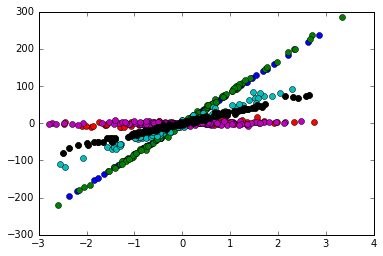

In [921]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

noise = 0
n_samples = 100 #Size of the dataset
n_dimensions = 1 #We are doing univariate regression, so leave this at 1
(x1,y1) = make_regression(n_samples=n_samples, n_features=n_dimensions, noise=noise)
(x1_test,y1_test) = make_regression(n_samples=50, n_features=n_dimensions, noise=noise)
plt.plot(x1,y1,'o')

############### More DATASETS

(x2,y2) = make_regression(n_samples=100, n_features=n_dimensions, noise=3)
(x2_test,y2_test) = make_regression(n_samples=50, n_features=n_dimensions, noise=3)
plt.plot(x2,y2,'o')

(x3,y3) = make_regression(n_samples=100, n_features=n_dimensions, noise=5)
(x3_test,y3_test) = make_regression(n_samples=50, n_features=n_dimensions, noise=5)
plt.plot(x3,y3,'o')

(x4,y4) = make_regression(n_samples=100, n_features=n_dimensions, noise=7)
(x4_test,y4_test) = make_regression(n_samples=50, n_features=n_dimensions, noise=7)
plt.plot(x4,y4,'o')

(x5,y5) = make_regression(n_samples=125, n_features=n_dimensions, noise=3)
(x5_test,y5_test) = make_regression(n_samples=62, n_features=n_dimensions, noise=3)
plt.plot(x5,y5,'o')

(x6,y6) = make_regression(n_samples=150, n_features=n_dimensions, noise=3)
(x6_test,y6_test) = make_regression(n_samples=75, n_features=n_dimensions, noise=3)
plt.plot(x6,y6,'o')

(x7, y7) = make_regression(n_samples=150, n_features=n_dimensions, noise=3)
(x7_test,y7_test) = make_regression(n_samples=75, n_features=n_dimensions, noise=3)
x7[-1] = 5
y7[-1] = 300
plt.plot(x6,y6,'o')

# Perform Linear Regression

Scikit-learn has an implementation of [Linear Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Below you see an example of how to use it.

## Problem 2
Use the scikit-learn method to fit your own datasets. What is the effect on the score of varying the amount of noise?

x1, with noise=0 and samples=100: 0.978769973347


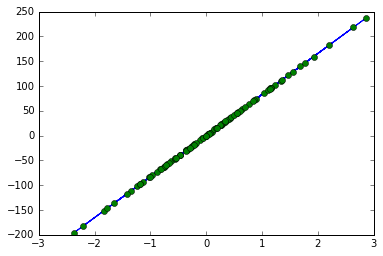

x2, with noise=3 and samples=100: -2.93905309626


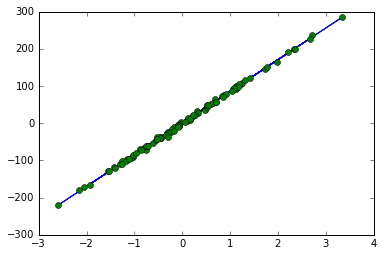

x3, with noise=5 and samples=100: 0.0128282471945


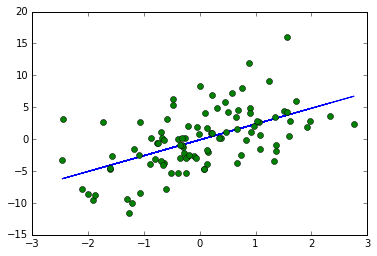

x4, with noise=7 and samples=100: 0.78037253171


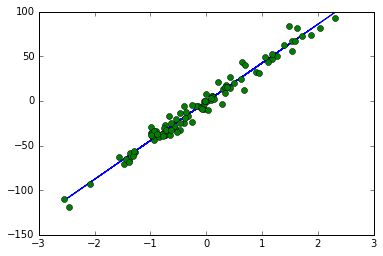

x5, with noise=3 and samples=125: -0.146758821805


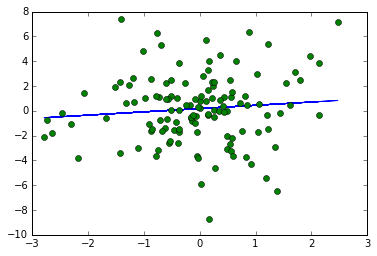

x6, with noise=3 and samples=150: 0.789900634486


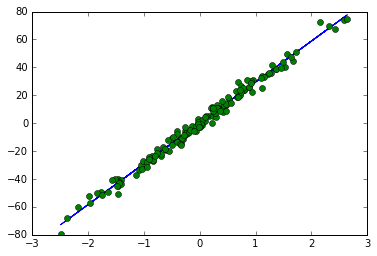

x7, with noise=3 and samples=150 and one outlier at x[-1],y[-1]: 0.997466540907


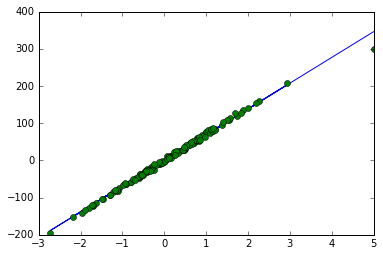

In [922]:
from sklearn.linear_model import LinearRegression

#The regression object
#this code constructs a local version of linear regression
regr = LinearRegression()

#Fit the regression object on the data
regr.fit(x1,y1)

#Print the score that the fit has
print "x1, with noise=0 and samples=100:", regr.score(x1_test,y1_test)

#Plot the resulting line
plt.plot(x1,regr.predict(x1))
plt.plot(x1,y1,'o')
plt.show()

#Linear regression for x2, y2
regr.fit(x2,y2)
print "x2, with noise=3 and samples=100:", regr.score(x2_test,y2_test)
plt.plot(x2,regr.predict(x2))
plt.plot(x2,y2,'o')
plt.show()

#Linear regression for x3, y3
regr.fit(x3,y3)
print "x3, with noise=5 and samples=100:", regr.score(x3_test,y3_test)
plt.plot(x3,regr.predict(x3))
plt.plot(x3,y3,'o')
plt.show()

#Linear regression for x4, y4
regr.fit(x4,y4)
print "x4, with noise=7 and samples=100:", regr.score(x4_test,y4_test)
plt.plot(x4,regr.predict(x4))
plt.plot(x4,y4,'o')
plt.show()

#Linear regression for x5, y5
regr.fit(x5,y5)
print "x5, with noise=3 and samples=125:", regr.score(x5_test,y5_test)
plt.plot(x5,regr.predict(x5))
plt.plot(x5,y5,'o')
plt.show()

#Linear regression for x6, y6
regr.fit(x6,y6)
print "x6, with noise=3 and samples=150:", regr.score(x6_test,y6_test)
plt.plot(x6,regr.predict(x6))
plt.plot(x6,y6,'o')
plt.show()

#Linear regression for x7, y7
regr.fit(x7,y7)
print "x7, with noise=3 and samples=150 and one outlier at x[-1],y[-1]:", regr.score(x7_test,y7_test)
plt.plot(x7,regr.predict(x7))
plt.plot(x7,y7,'o')
plt.show()

## Analysis

The bigger the noise -> the bigger the standard deviation and how less the dataset looks like a straight line
And as the linear regression is made with one data set with specific values and the regression score is fitted on a different dataset with the same values; the smaller the noise is, the smaller the chance is that the two datasets have common points and therefore the smaller the chance is that the linear regression fits on both of the datasets. So, if the noise is big, the regression value is more often small.

x2, with noise=3 and samples=100: -2.93905309626


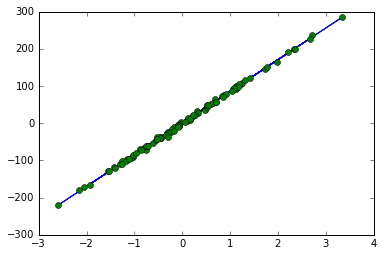

x2, with noise=3 and samples=100 and with added outliers: -0.224292037156


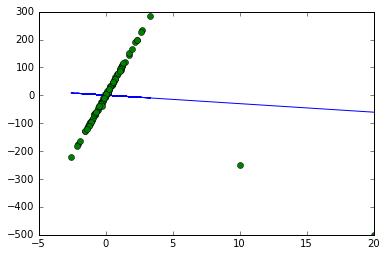

In [923]:
#Linear regression for x2, y2
regr.fit(x2,y2)
print "x2, with noise=3 and samples=100:", regr.score(x2_test,y2_test)
plt.plot(x2,regr.predict(x2))
plt.plot(x2,y2,'o')
plt.show()

#Creating big outlier:
x2[-2] = 10 #negative indices begin at the end. So this changes the last couple of values of x1 and y1
y2[-2] = -250
x2[-1] = 20 
y2[-1] = -500

#Create a plot that shows how the prediction can be very wrong in the presence of a serious outlier.
#Linear regression for x2, y2
regr.fit(x2,y2)
print "x2, with noise=3 and samples=100 and with added outliers:", regr.score(x2_test,y2_test)
plt.plot(x2,regr.predict(x2))
plt.plot(x2,y2,'o')
plt.show()

## Problem 3: Implement Linear regression

In class you looked at performing regression using gradient descent. Now you are going to implement it.

Make sure to comment your code!

In [924]:
#The function that calculates the hypothesis according to the given x, theta0 and theta1:
def prediction_function(x,theta0,theta1):
    return numpy.add(theta0, theta1*x)

In [925]:
#Using the output of the hypothesis, this is the cost function J:
def cost_function(x_predict,y): #x-predict is the result of the prediction_function: the hypothesis
    #I use the transpose of x_predict, as the dimensions of x_predict and y should be so that they are substractable
    xt = x_predict.transpose() 
    return numpy.sum((xt-y)**2)/(2*len(x_predict)) #numpy.sum((xt-y)**2) gives the summation of (hypothesis-y)^2

In [926]:
#Create a function that returns the gradient values, given the hypothesis (x_predict), y and x:
def compute_gradient(x_predict,y,x):
    xt = x_predict.transpose()
    dtheta0 = numpy.sum((xt-y))/len(x_predict)
    dtheta1 = numpy.sum((xt-y)*x)/len(x_predict)
    return dtheta0, dtheta1

(1L, 100L) (100L,)


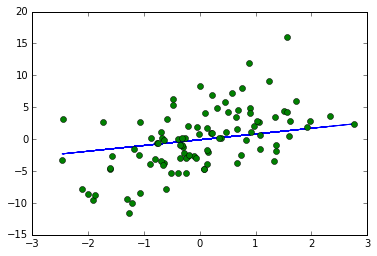

The cost function, plotted out against the amount of iterations:


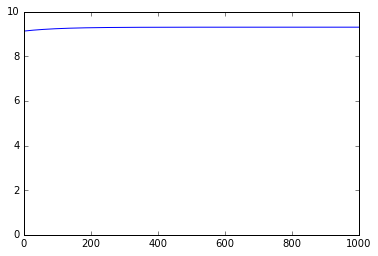

In [927]:
#DEFAULT PARAMETERS
alpha = 0.01
iterations = 1000
stopcondition = -100
theta0 = 0
theta1 = 1
i = 0
dtheta0 = 0 #initialize the variables that will represent the partial derivatives of the cost function
dtheta1 = 0
x = x3
y = y3
#I use the transpose of x_predict, as the dimensions of x_predict and y should be so that they are substractable
xt = x.transpose()
print xt.shape, y.shape #check if the dimensions now allow the arrays to be substracted from eachother
cost = np.zeros(shape=(1,)) #create an array of zeros to be able to save the cost after every iteration

#I also played around with a smaller and constant data set:
#x = np.array([1,4,6,7,8,9,10,13,14,15,16,16.5,17])
#y = np.array([0,2,3,2,4,5,4,6,7,9,10,12,13])

#ALL FUNCTIONS COME TOGETHER
while (i < iterations) and (cost[-1] > stopcondition):
    x_predict = prediction_function(x,theta0,theta1) #update the hypothesis
    cost = np.append(cost, cost_function(x_predict,y)) #save the current cost function
    dtheta0, dtheta1 = compute_gradient(x_predict,y,x)
    theta0 -= alpha*dtheta0 #update theta0 for the gradient descent
    theta1 -= alpha*dtheta1 #update theta1 for the gradient descent
    i = i + 1 #counter for the iterations

#PLOT THE FUNCTIONS
#plot of x against the data and x against the hypothesis 
plt.plot(x,prediction_function(x,theta0,theta1)) 
plt.plot(x,y,'o')
plt.show()

#plot of the cost function against the amount of iterations
print "The cost function, plotted out against the amount of iterations:"
ar = np.arange(iterations+1) #make an array from 0 to (iterations+1)
plt.plot(ar,cost)

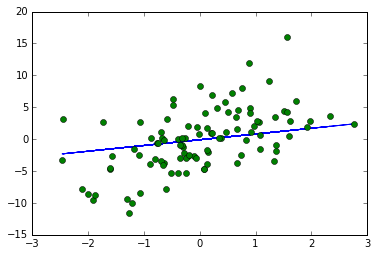

The cost function, plotted out against the amount of iterations:


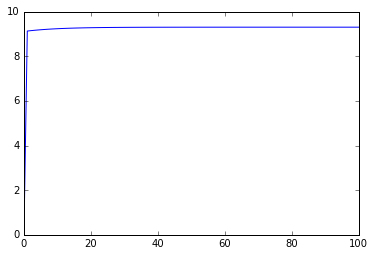

In [928]:
#DEFAULT PARAMETERS
theta0 = 0
theta1 = 1
i = 0
cost = np.zeros(shape=(1,)) #create an array of zeros to be able to save the cost after every iteration

#Now, play with these variables
alpha = 0.1
iterations = 100
stopcondition = -100

#ALL FUNCTIONS COME TOGETHER
while (i < iterations) and (cost[-1] > stopcondition):
    x_predict = prediction_function(x,theta0,theta1) #update the hypothesis
    cost = np.append(cost, cost_function(x_predict,y)) #save the current cost function
    dtheta0, dtheta1 = compute_gradient(x_predict,y,x)
    theta0 -= alpha*dtheta0 #update theta0 for the gradient descent
    theta1 -= alpha*dtheta1 #update theta1 for the gradient descent
    i = i + 1 #counter for the iterations

#PLOT THE FUNCTIONS
#plot of x against the data and x against the hypothesis 
plt.plot(x,prediction_function(x,theta0,theta1)) 
plt.plot(x,y,'o')
plt.show()

#plot of the cost function against the amount of iterations
print "The cost function, plotted out against the amount of iterations:"
ar = np.arange(iterations+1) #make an array from 0 to (iterations+1)
plt.plot(ar,cost)

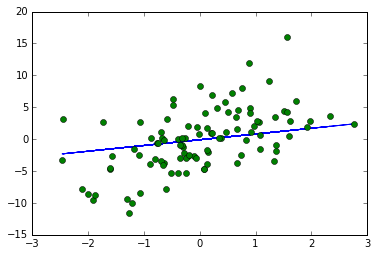

The cost function, plotted out against the amount of iterations:


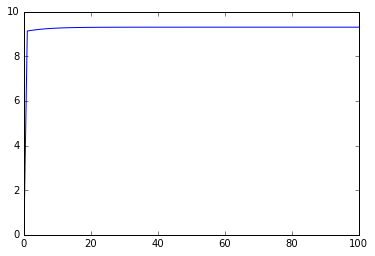

In [929]:
#DEFAULT PARAMETERS
theta0 = 0
theta1 = 1
i = 0
cost = np.zeros(shape=(1,)) #create an array of zeros to be able to save the cost after every iteration

#Now, play with these variables
alpha = 0.15
iterations = 100
stopcondition = -100

#ALL FUNCTIONS COME TOGETHER
while (i < iterations) and (cost[-1] > stopcondition):
    x_predict = prediction_function(x,theta0,theta1) #update the hypothesis
    cost = np.append(cost, cost_function(x_predict,y)) #save the current cost function
    dtheta0, dtheta1 = compute_gradient(x_predict,y,x)
    theta0 -= alpha*dtheta0 #update theta0 for the gradient descent
    theta1 -= alpha*dtheta1 #update theta1 for the gradient descent
    i = i + 1 #counter for the iterations

#PLOT THE FUNCTIONS
#plot of x against the data and x against the hypothesis 
plt.plot(x,prediction_function(x,theta0,theta1)) 
plt.plot(x,y,'o')
plt.show()

#plot of the cost function against the amount of iterations
print "The cost function, plotted out against the amount of iterations:"
ar = np.arange(iterations+1) #make an array from 0 to (iterations+1)
plt.plot(ar,cost)

## Problem 4

Write a short analysis about the amount of iterations necessary to obtain a good result, the influence of the learning rate and the trend of the cost function. 

# Bonus Problem: Implement Least Squares with closed form solution

For the Least Squares method there is also a closed-form solution.

$\theta_1$ can be found by:
$$ \boldsymbol{\hat\theta_1} =( X ^TX)^{-1}X^{T}\boldsymbol y $$

You can leave $\theta_0$ to be 0. Make a plot with your data as dots and your prediction as a line.

In [930]:
#The bonus question doesn't work yet, I get weird plots

In [931]:
#The hypothesis function, with theta0=0
def predict(x,theta):
    return theta*x

In [932]:
#Using the output of the hypothesis, this is the cost function J:
def costfunct(x_pred,y): #x_pred is the result of the predict function: the hypothesis
    #I use the transpose of x_predict, as the dimensions of x_predict and y should be so that they are substractable
    xt = x_pred.transpose()
    return numpy.sum((xt-y)**2)/(2*len(x_pred))

In [933]:
#The new function for the gradient descent with the Least Squares method
def compute(x_pred,y):
    xt = x_pred.transpose()
    theta = numpy.linalg.inv(xt*x_pred)*xt*y #implemetation of the given function for theta-hat
    return theta

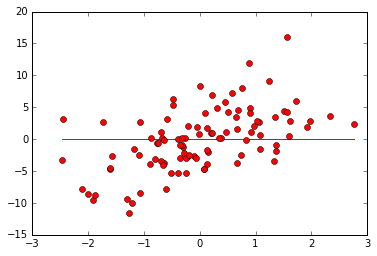

The cost function, plotted out against the amount of iterations:


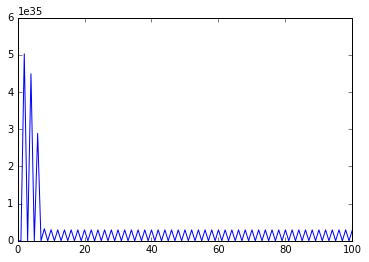

In [934]:
#DEFAULT PARAMETERS
alpha = 0.01
iterations = 100
stopcondition = 0
theta = 1
x = x3
y = y3
i = 0
cost = np.zeros(shape=(1,)) #create an array of zeros to be able to save the cost after every iteration

#ALL FUNCTIONS COME TOGETHER
while (i < iterations): #and (theta[-1] > 0):
    x_pred = predict(x,theta) #update the hypothesis
    cost = np.append(cost, costfunct(x_pred,y)) #save the current cost function
    theta = compute(x_pred,y) #update theta for the gradient descent
    i = i + 1

#PLOT THE FUNCTIONS
#plot of x against the data and x against the hypothesis 
plt.plot(x,predict(x,theta))
plt.plot(x,y,'o')
plt.show()

#plot of the cost function against the amount of iterations
print "The cost function, plotted out against the amount of iterations:"
ar = np.arange(iterations+1) #make an array from 0 to (iterations+1)
plt.plot(ar,cost)